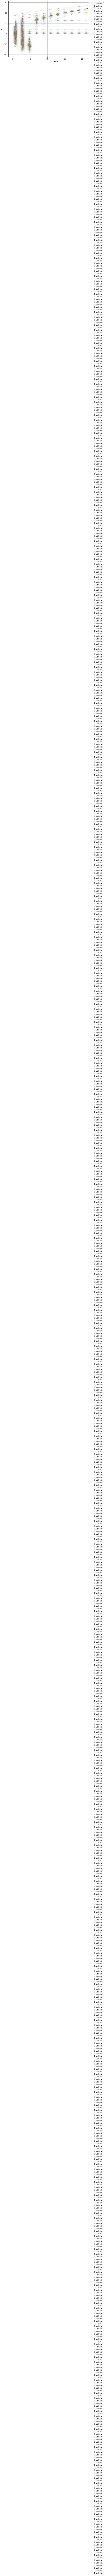

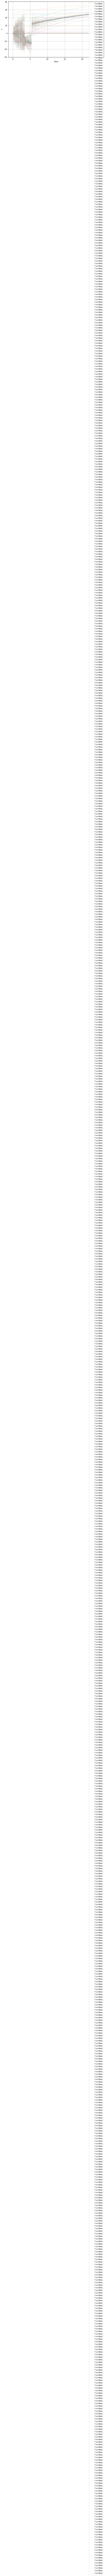

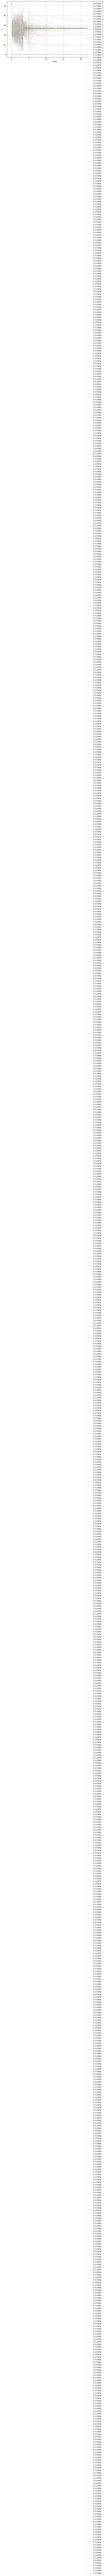

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def lorenz_system(t, xyz, sigma, rho, beta):
    """
    Lorenz system equations.
    Returns the derivatives of x, y, and z variables.
    """
    x, y, z = xyz

    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z

    return [dx, dy, dz]

# Parameters
sigma = 10.0
rho = 28.0
beta_range = np.linspace(0, 25, 100)  # Varying beta from 0 to 40

x_values = []
y_values = []
z_values = []

# Initial conditions
x_0 = 0.1
y_0 = 0.0
z_0 = 0.0

# Time range for the simulation
tStart = 0.0
tEnd = 50.0

# Iterate through each beta in the beta range
for beta in beta_range:
    # Solve the Lorenz system for the current beta
    solution = solve_ivp(lorenz_system, [tStart, tEnd], [x_0, y_0, z_0],
                         method='RK45', t_eval=np.linspace(tStart, tEnd, 1000),
                         args=(sigma, rho, beta))

    # Extract the results for x, y, and z
    x_values.append(solution.y[0])
    y_values.append(solution.y[1])
    z_values.append(solution.y[2])

# Plot the bifurcation plot for x vs beta
plt.figure(figsize=(10, 6))
plt.plot(beta_range, x_values, '.', markersize=1, label='X vs Beta')
plt.xlabel('Beta')
plt.ylabel('X')
plt.legend()
plt.grid(True)
plt.show()

# Plot the bifurcation plot for y vs beta
plt.figure(figsize=(10, 6))
plt.plot(beta_range, y_values, '.', markersize=1, label='Y vs Beta')
plt.xlabel('Beta')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Plot the bifurcation plot for z vs beta
plt.figure(figsize=(10, 6))
plt.plot(beta_range, z_values, '.', markersize=1, label='Z vs Beta')
plt.xlabel('Beta')
plt.ylabel('Z')
plt.legend()
plt.grid(True)
plt.show()

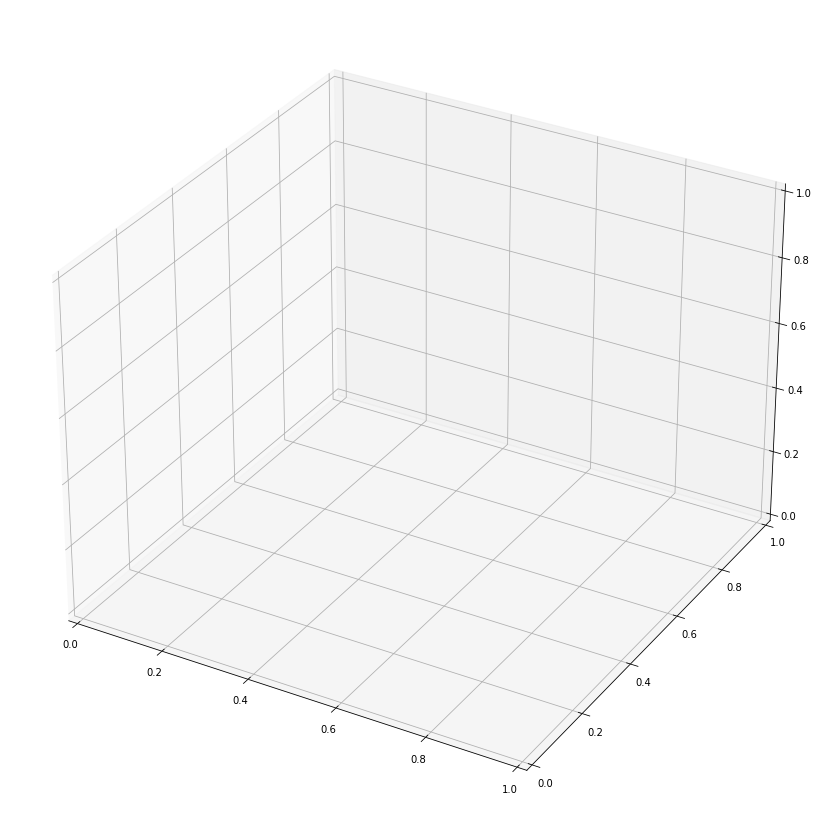

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation

def lorenz_system(t, xyz, sigma, rho, beta):
    """
    Lorenz system equations.
    Returns the derivatives of x, y, and z variables.
    """
    x, y, z = xyz

    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z

    return [dx, dy, dz]

# Parameters
sigma = 10.0
rho = 24.3
beta = 8.0 / 3.0

# Initial conditions
x_0 = 0.1
y_0 = 0.0
z_0 = 0.0

# Time range for the simulation
tStart = 0.0
tEnd = 100.0

# Time points for the animation frames
num_frames = 1000
t_points = np.linspace(tStart, tEnd, num_frames)

# Solve the Lorenz system for all time points
solution = solve_ivp(lorenz_system, [tStart, tEnd], [x_0, y_0, z_0],
                     method='RK45', t_eval=t_points, args=(sigma, rho, beta))

# Extract the results for x, y, and z
x_values = solution.y[0]
y_values = solution.y[1]
z_values = solution.y[2]

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['figure.figsize'] = [15,15]

# Function to update the 3D plot for each animation frame
def update_plot(frame):
    ax.cla()  # Clear the previous frame
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Lorenz System - Time: {t_points[frame]:.2f}')
    ax.plot(x_values[:frame+1], y_values[:frame+1], z_values[:frame+1], color='b')
    ax.scatter(x_values[frame], y_values[frame], z_values[frame], color='r', s=50)

# Create the animation
animation = FuncAnimation(fig, update_plot, frames=num_frames, interval=50)

# Show the animation
plt.show()

# Save the animation as an MP4 video file
animation.save('lorenz_animation.gif', writer='pillow')

# Show the animation
plt.show()